In [1]:
import pandas as pd
import math
import matplotlib.pyplot as plt
from sklearn import preprocessing as prep
import time

df = pd.read_csv("insurance.csv")

In [2]:
df.shape

(1338, 7)

In [3]:
#identifying how many nulls we have in our dataset
df.isnull().sum()

age         3
sex         3
bmi         0
children    0
smoker      0
region      5
charges     4
dtype: int64

In [4]:
df.isnull().query("charges == True | age == True")
#charges = null @ 128,144,302,429
#age = null @ 22,284,1330

,age,sex,bmi,children,smoker,region,charges
22,True,False,False,False,False,False,False
128,False,False,False,False,False,False,True
144,False,False,False,False,False,False,True
284,True,False,False,False,False,False,False
302,False,False,False,False,False,False,True
429,False,False,False,False,False,False,True
1330,True,False,False,False,False,False,False


In [5]:
#checking for numerical data, we find that sex has 3 numeric entries and region has 5 where they are not supposed to. 
df_isreal = df.applymap(pd.np.isreal)
df_isreal.sum()

age         1338
sex            3
bmi         1338
children    1338
smoker         0
region         5
charges     1338
dtype: int64

In [6]:
#locating the numerical data in sex and regiom
df_isreal.query("sex == True | region ==  True")

,age,sex,bmi,children,smoker,region,charges
16,True,True,True,True,False,False,True
66,True,True,True,True,False,False,True
162,True,True,True,True,False,False,True
201,True,False,True,True,False,True,True
219,True,False,True,True,False,True,True
234,True,False,True,True,False,True,True
430,True,False,True,True,False,True,True
598,True,False,True,True,False,True,True


In [7]:
#all the "numerical" data are just null values. i didn't identify any accidental inputs. 
df.iloc[[16,66,162,201,219,234,430,598]]

,age,sex,bmi,children,smoker,region,charges
16,52.0,NaN,30.78,1,no,northeast,10797.33620
66,61.0,NaN,39.10,2,no,southwest,14235.07200
162,54.0,NaN,39.60,1,no,southwest,10450.55200
201,48.0,female,32.23,1,no,NaN,8871.15170
219,24.0,female,23.21,0,no,NaN,25081.76784
234,39.0,male,24.51,2,no,NaN,6710.19190
430,19.0,male,33.10,0,no,NaN,23082.95533
598,43.0,male,32.60,2,no,NaN,7441.50100


In [8]:
#for all nulls in catergorical columns, replacing value with a new category called 'missing'

df['sex'] = df.sex.fillna('Missing')
df['region'] = df.region.fillna('Missing')

#df has been altered
df.iloc[[16,66,162,201,219,234,430,598]]

,age,sex,bmi,children,smoker,region,charges
16,52.0,Missing,30.78,1,no,northeast,10797.33620
66,61.0,Missing,39.10,2,no,southwest,14235.07200
162,54.0,Missing,39.60,1,no,southwest,10450.55200
201,48.0,female,32.23,1,no,Missing,8871.15170
219,24.0,female,23.21,0,no,Missing,25081.76784
234,39.0,male,24.51,2,no,Missing,6710.19190
430,19.0,male,33.10,0,no,Missing,23082.95533
598,43.0,male,32.60,2,no,Missing,7441.50100


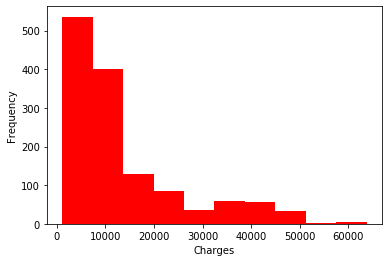

Mean = 13233.902867009716
Median = 9296.016525


In [47]:
#histogram is not normal, rightly skewed, we need to get the mean to closer to the median by moving it to the left. 
charges = df["charges"]
plt.hist(charges, bins = 10, color = 'r')
plt.xlabel("Charges")
plt.ylabel("Frequency")
plt.show()
print("Mean = " +str(df["charges"].mean()))
print("Median = "+str(df["charges"].median()))

In [45]:
#natural logging all the "charges" values to create a more normal dist. 
log_charges = df["charges"].apply(pd.np.log)

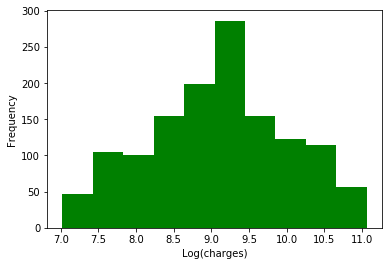

Mean = 9.096261381679277
Median = 9.137341056892282
Distribution is normal 

The log-derived mean, 8921.87, moved to left and is closer to the median


In [48]:
#histogram appears to be more normal
plt.hist(log_charges, bins=10, color = 'g')
plt.xlabel("Log(charges)")
plt.ylabel("Frequency")
plt.show()
print("Mean = " +str(log_charges.mean()))
print("Median = " +str(log_charges.median()))
print("Distribution is normal \n")
mean_charges = math.e**log_charges.mean()
mean_charges = round(mean_charges, 2)
print("The log-derived mean, "+ str(mean_charges)+", moved to left and is closer to the median")

In [15]:
#setting all null values to the log-derived mean
df['charges'] = df.charges.fillna(mean_charges)

In [16]:
#everything is replaced w/ the log derived mean
df.iloc[[128,144,302,429]]

,age,sex,bmi,children,smoker,region,charges
128,32.0,female,17.765,2,yes,northwest,8921.87
144,30.0,male,28.690,3,yes,northwest,8921.87
302,56.0,female,37.510,2,no,southeast,8921.87
429,27.0,female,30.400,3,no,northwest,8921.87


In [17]:
#normalizing age datas by using the min/max scalar. 
df_num = df[['age']].values.astype(float)
min_max_scaler = prep.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(df_num)
normalized = pd.DataFrame(x_scaled)

#reversing the min/max mean to get a min/max scaled-derived mean that is relevant for our purposes. 
mean_age = (normalized.mean() * (df['age'].max()-df['age'].min()))+18
mean_age = int(mean_age)

#filling in all null values with min/max-derived mean
df['age'] = df.age.fillna(mean_age)


In [18]:
#all null values changed to mean which is 39.0
df.iloc[[22,284,1330]]

,age,sex,bmi,children,smoker,region,charges
22,39.0,male,34.10,0,no,southeast,1137.0110
284,39.0,female,31.20,0,no,southwest,9625.9200
1330,39.0,female,25.74,2,no,southeast,12629.1656


In [22]:
#saving df to a new csv
df.to_csv("insurance_cleaned.csv")